## Base de dados breast_cancer

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv", header = 0)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   
2  ...          25.53            152.5      1709.0            0.1444   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  

[3 rows x 33 columns]

Temos 30 colunas presentes no dataset fornecido, sendo 30 delas variáveis características (dados de entrada) a variável-alvo (que queremos que o nosso modelo seja capaz de prever) está em um dataset separado chamado 'saidas_breast.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

É possivel observar que todas as variáveis são do tipo ``float64`` (números "decimais").

Já que todos os valores do nosso dataset são numéricos, nós não precisaremos fazer o a transformação do tipo "object" para o tipo númerico.

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis

Deletando a coluna `id` e``Unnamed: 32``:

In [6]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

#### Encontrando dados faltantes (NaN)
Nosso dataset não possui valores faltantes como diz no site UCI, mas por via das dúvidas:

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Como esperado, não temos valores faltantes :D

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# previsores
X = df[df.columns[1:]]
# classe
y = df["diagnosis"]

###### Importações
Para isso, utilizaremos a biblioteca ``keras``

In [10]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
# Validação cruzada
from sklearn.model_selection import cross_val_score
# Tuning dos paramêtros
from sklearn.model_selection import GridSearchCV
# Salvar/Carregar a rede neural
from keras.models import model_from_json

#### Redes Neurais Artificiais
O objetivo do algoritmo de Redes neurais é imitar o sistema nervoso de humanos no processo de aprendizagem, ela é inspirada nas redes neurais biológicas
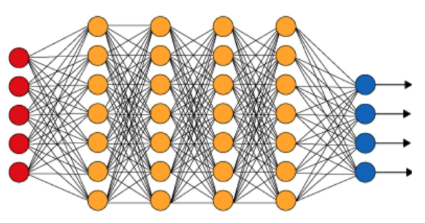

###### Parâmetros da rede neural artificial:
Link: https://keras.io/

    Sequential - Criação de uma nova rede neural
    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios que fazem parte da camada oculta
    activation - Função de ativação que será inserida
    kernel_initializer - inicialização dos pesos
    input_dim - quantos elementos existem na camada de entrada
    Dropout - é usado para diminuir a chance de overfitting (20% dos neurônios de entrada são zerados)
   
Ponto de partida para o paramêtro ``units`` - número de entradas(30) +  número de saidas(1) / 2 = 16
    
###### Parâmetros do otimizador

    lr - linha de aprendizagem
    decay - Função de decaimento com relação a taxa de aprendizagem (ideal ter valores menores)
    clipvalue - 'clipa' o valor tendo valores máximos/minimos que ao chegar neles congela os valores para sair do padrão
    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)
    metrics - Métrica de avaliação (pode ser colocado mais de um)

In [11]:
def criarRede():
    classificador = Sequential()
    # Camada de entrada 30 neurônios e camada oculta com 16
    classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 30))
    classificador.add(Dropout(0.2))
    # Camada oculta 2
    classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
    classificador.add(Dropout(0.2))
    # Camada de saida
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    # Otimizador (Utilizando-o a taxa de acerto cai para 83~86%)
    #otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    # configurações
    classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classificador

###### Parâmetros da criação da rede

    build_fn - Função de criação da rede neural
    epochs - quantidade de vezes que será feito o ajuste dos pesos
    batch_size - cálculo de erro a cada 10 registros

###### Parâmetros da validação cruzada

    estimator - Função de criação da rede neural
    X - Atributos previsores
    y - Classe de saída
    cv - Quantidade de vezes do teste (10 divisões na base de dados)
    scoring - retorno dos resultados

In [12]:
classificador = KerasClassifier(build_fn = criarRede, epochs = 100, batch_size = 10)
# cv = número de testes que será feito
resultados = cross_val_score(estimator = classificador,
                             X = X, y = y,
                             cv = 10, scoring = 'accuracy')

Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 0.9816 - binary_accuracy: 0.5011
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6950 - binary_accuracy: 0.5912
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5968 - binary_accuracy: 0.7636
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5665 - binary_accuracy: 0.8143
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5768 - binary_accuracy: 0.8476
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5215 - binary_accuracy: 0.8427
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4737 - binary_accuracy: 0.8665
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4338 - binary_accuracy: 0.8412
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4227 - binary_accuracy: 0.8657
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 1.0175 - binary_accuracy: 0.5879
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6413 - binary_accuracy: 0.6820
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6093 - binary_accuracy: 0.7339
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5443 - binary_accuracy: 0.7557
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4807 - binary_accuracy: 0.7788
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4496 - binary_accuracy: 0.8232
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4863 - binary_accuracy: 0.7873
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4301 - binary_accuracy: 0.8336
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3798 - binary_accuracy: 0.8550
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 1.2061 - binary_accuracy: 0.4685
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6108 - binary_accuracy: 0.6961
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5526 - binary_accuracy: 0.7738
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5245 - binary_accuracy: 0.8105
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4546 - binary_accuracy: 0.8343
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4303 - binary_accuracy: 0.8296
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4288 - binary_accuracy: 0.8537
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4026 - binary_accuracy: 0.8354
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3867 - binary_accuracy: 0.8451
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 1.2569 - binary_accuracy: 0.4252
Epoch 2/100
52/52 [==============================] - 0s 982us/step - loss: 0.7114 - binary_accuracy: 0.5271
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5974 - binary_accuracy: 0.7930
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5674 - binary_accuracy: 0.8472
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4929 - binary_accuracy: 0.9067
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4882 - binary_accuracy: 0.8914
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4625 - binary_accuracy: 0.8821
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4376 - binary_accuracy: 0.8525
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4092 - binary_accuracy: 0.8880
Epoch 10/100
52/52 [========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 1.4296 - binary_accuracy: 0.4821
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.7708 - binary_accuracy: 0.6063
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5866 - binary_accuracy: 0.7457
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5541 - binary_accuracy: 0.7862
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5162 - binary_accuracy: 0.7977
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5166 - binary_accuracy: 0.8064
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4011 - binary_accuracy: 0.8563
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4012 - binary_accuracy: 0.8474
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3951 - binary_accuracy: 0.8187
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 0.7396 - binary_accuracy: 0.5906
Epoch 2/100
52/52 [==============================] - 0s 963us/step - loss: 0.6095 - binary_accuracy: 0.7134
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5654 - binary_accuracy: 0.7679
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5436 - binary_accuracy: 0.7980
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5136 - binary_accuracy: 0.8325
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4987 - binary_accuracy: 0.8107
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5048 - binary_accuracy: 0.7847
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4902 - binary_accuracy: 0.7956
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4594 - binary_accuracy: 0.8293
Epoch 10/100
52/52 [========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 0.8362 - binary_accuracy: 0.5525
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6795 - binary_accuracy: 0.6115
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6744 - binary_accuracy: 0.6555
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6505 - binary_accuracy: 0.6374
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5766 - binary_accuracy: 0.7436
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5783 - binary_accuracy: 0.7283
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5229 - binary_accuracy: 0.7937
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4787 - binary_accuracy: 0.8385
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4162 - binary_accuracy: 0.8241
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 2.4191 - binary_accuracy: 0.5871
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6186 - binary_accuracy: 0.7186
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4514 - binary_accuracy: 0.7888
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4682 - binary_accuracy: 0.7722
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4212 - binary_accuracy: 0.8100
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4466 - binary_accuracy: 0.7688
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3430 - binary_accuracy: 0.8192
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3379 - binary_accuracy: 0.8529
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3610 - binary_accuracy: 0.8589
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 1.3041 - binary_accuracy: 0.4980
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6183 - binary_accuracy: 0.6236
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6078 - binary_accuracy: 0.6971
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5420 - binary_accuracy: 0.7088
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4784 - binary_accuracy: 0.7963
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4922 - binary_accuracy: 0.7264
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4476 - binary_accuracy: 0.8516
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3754 - binary_accuracy: 0.8864
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3637 - binary_accuracy: 0.8759
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
52/52 [==============================] - 1s 1ms/step - loss: 2.1793 - binary_accuracy: 0.4793
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 0.7412 - binary_accuracy: 0.5584
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 0.6788 - binary_accuracy: 0.6487
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5836 - binary_accuracy: 0.7320
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 0.5213 - binary_accuracy: 0.7957
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4530 - binary_accuracy: 0.8356
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4699 - binary_accuracy: 0.7852
Epoch 8/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4436 - binary_accuracy: 0.8441
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.4372 - binary_accuracy: 0.8341
Epoch 10/100
52/52 [==========================

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [13]:
# Probabilidade de cada teste
resultados

array([0.80701754, 0.9122807 , 0.92982456, 0.89473684, 1.        ,
       0.96491228, 0.94736842, 0.92982456, 0.9122807 , 0.98214286])

In [14]:
# Média final
resultados.mean()

0.9280388471177945

In [15]:
# Desvio padrão
resultados.std()

0.051085349347405815